<a href="https://colab.research.google.com/github/castorhyun/DeepLearningZeroToAll/blob/master/CIFAR10_CNN_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms



https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

파이토치 튜토리얼 참고


In [22]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)


validation_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False)



testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Show image


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5 #unnormalize
  npimg = img.numpy()

  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()



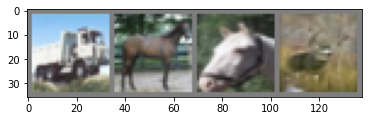

truck horse horse  deer


In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

#show image
imshow(torchvision.utils.make_grid(images))

#print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4) ))

Define CNN

In [16]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()

    # Conv2D(in_channels, out_channels, kernel_size)
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)

    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)



  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))

    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))

    x = self.fc3(x)

    return x


net = Net()


In [5]:
import torch.nn as nn
import torch.nn.functional as F

# LeNet

class LeNet(nn.Module):

  def __init__(self):
    super().__init__()
    # 채널, 출력, filter size, stride
    self.conv1 = nn.Conv2d(3, 20,5, 1)

    self.conv2 = nn.Conv2d(20, 50, 5, 1)
    
    self.fc1 = nn.Linear(5*5*50, 500)

    self.dropout1 = nn.Dropout(0.5)

    self.fc2 = nn.Linear(500,10)


  def forward(self, x):

    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)

    #flatten
    x = x.view(-1, 5*5*50)

    x = F.relu(self.fc1(x))
    x = self.dropout1(x)
    x = self.fc2(x)

    return x


net = LeNet()


In [7]:
class LeNet_2(nn.Module):
  
  def __init__(self):
    super().__init__()
    # 32px 이었다가, conv를 거치면서 절반으로 감소
    self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1)
    self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1)
    self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1)
    self.fc1 = nn.Linear(4*4*64, 500)
    self.dropout1 = nn.Dropout(0.5)
    self.fc2 = nn.Linear(500, 10)
    
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, 2, 2)
    x = x.view(-1, 4*4*64)
    x = F.relu(self.fc1(x))
    x = self.dropout1(x)
    x = self.fc2(x)
    return x

  
net = LeNet_2()

Loss and optimizer

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)



Training Network

Training

In [23]:
epochs = 12
running_loss_history = []
running_correct_history = []
validation_running_loss_history = [] 
validation_running_correct_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_correct = 0.0
  validation_running_loss = 0.0
  validation_running_correct = 0.0
  
  for i, data in enumerate(trainloader, 0):
    # data : list of [inputs, labels]
    inputs, labels = data

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    
    running_correct += torch.sum(preds == labels.data)
    running_loss += loss.item()
    



    
  else:    
    # 훈련팔 필요가 없으므로 메모리 절약
    with torch.no_grad():
      
      for i, data in  enumerate(validation_loader, 0):
        
        val_input, val_label = data

        val_outputs = net(val_input)
        val_loss = criterion(val_outputs, val_label)
        
        _, val_preds = torch.max(val_outputs, 1)
        validation_running_loss += val_loss.item()
        validation_running_correct += torch.sum(val_preds == val_label.data) 
    
    
    epoch_loss = running_loss / len(trainloader)
    epoch_acc = running_correct.float() / len(trainloader)
    running_loss_history.append(epoch_loss)
    running_correct_history.append(epoch_acc)
    
    val_epoch_loss = validation_running_loss / len(validation_loader)
    val_epoch_acc = validation_running_correct.float() / len(validation_loader)
    validation_running_loss_history.append(val_epoch_loss)
    validation_running_correct_history.append(val_epoch_acc)
    
    print("===================================================")
    print("epoch: ", e + 1)
    print("training loss: {:.5f}, acc: {:5f}".format(epoch_loss, epoch_acc))
    print("validation loss: {:.5f}, acc: {:5f}".format(val_epoch_loss, val_epoch_acc))

epoch:  1
training loss: 0.43293, acc: 84.835999
validation loss: 0.84190, acc: 73.669998
epoch:  2
training loss: 0.38603, acc: 86.610001
validation loss: 0.83917, acc: 74.449997
epoch:  3
training loss: 0.36230, acc: 87.438004
validation loss: 0.84406, acc: 74.209999
epoch:  4
training loss: 0.34839, acc: 87.891998
validation loss: 0.85163, acc: 74.389999
epoch:  5
training loss: 0.33404, acc: 88.351997
validation loss: 0.85841, acc: 74.360001
epoch:  6
training loss: 0.32638, acc: 88.676003
validation loss: 0.84996, acc: 75.029999
epoch:  7
training loss: 0.31757, acc: 88.975998
validation loss: 0.86539, acc: 74.489998
epoch:  8
training loss: 0.30743, acc: 89.216003
validation loss: 0.86971, acc: 74.190002
epoch:  9
training loss: 0.29781, acc: 89.648003
validation loss: 0.88086, acc: 74.489998
epoch:  10
training loss: 0.29272, acc: 89.830002
validation loss: 0.86548, acc: 74.519997
epoch:  11
training loss: 0.28379, acc: 90.028000
validation loss: 0.88183, acc: 74.589996
epoch:  